In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('EmployeeSurvey.csv')
df

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,...,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,45,Female,33,Married,Mid,10,Operations,Part-Time,2,3,...,6.2,Car,8,3,13,0,Bachelor,False,35.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,6.8,Public Transport,15,8,28,8,Master,False,58.0,1
2762,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,6.9,Car,28,8,21,8,Master,True,54.0,1
2763,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,6.1,Public Transport,9,6,23,3,Master,True,58.5,1
2764,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,7.7,Public Transport,18,10,30,7,Master,True,58.0,1


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

In [ ]:
df.shape

(2766, 23)

In [ ]:
df.isnull().sum()

,0
emp_id,0
gender,0
age,0
marital_status,0
job_level,0
experience,0
dept,0
emp_type,0
wlb,0
work_env,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Pembersihan data (menghapus baris dengan missing values jika ada)
df = df.dropna()

In [ ]:
# Ringkasan statistik dasar
df.describe()

,emp_id,age,experience,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_distance,num_companies,team_size,num_reports,training_hours_per_year,job_satisfaction
count,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000
mean,1516.601952,35.650759,8.989154,3.049530,3.028923,2.038250,2.979031,1.737166,7.008351,13.419740,4.223066,16.491685,2.374187,37.220535,3.380694
std,873.996466,10.175719,7.003013,1.448103,1.417494,0.966535,1.405335,1.065303,1.003736,8.344388,3.377586,6.638354,3.055823,13.540622,1.267785
min,1.000000,22.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,0.000000,10.000000,1.000000
25%,764.500000,27.000000,3.000000,2.000000,2.000000,1.400000,2.000000,1.000000,6.300000,6.000000,1.000000,11.000000,0.000000,23.500000,3.000000
50%,1515.500000,34.000000,8.000000,3.000000,3.000000,2.100000,3.000000,1.000000,7.000000,13.000000,4.000000,16.000000,0.000000,39.500000,4.000000
75%,2271.750000,43.000000,14.000000,4.000000,4.000000,2.700000,4.000000,2.000000,7.700000,20.000000,7.000000,22.000000,5.000000,46.500000,4.000000
max,3025.000000,60.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,29.000000,12.000000,30.000000,9.000000,64.500000,5.000000


## Analisis hubungan

In [ ]:
# Korelasi numerik (experience, training_hours_per_year, workload, sleep_hours)
numeric_vars = ['experience', 'training_hours_per_year', 'workload', 'sleep_hours', 'physical_activity_hours']
for var in numeric_vars:
    corr, p_value = pearsonr(df[var], df['job_satisfaction'])
    print(f"\nKorelasi {var} dengan job_satisfaction: {corr:.3f} (p-value: {p_value:.3f})")


Korelasi experience dengan job_satisfaction: -0.014 (p-value: 0.464)

Korelasi training_hours_per_year dengan job_satisfaction: -0.010 (p-value: 0.609)

Korelasi workload dengan job_satisfaction: -0.257 (p-value: 0.000)

Korelasi sleep_hours dengan job_satisfaction: 0.177 (p-value: 0.000)

Korelasi physical_activity_hours dengan job_satisfaction: -0.012 (p-value: 0.525)


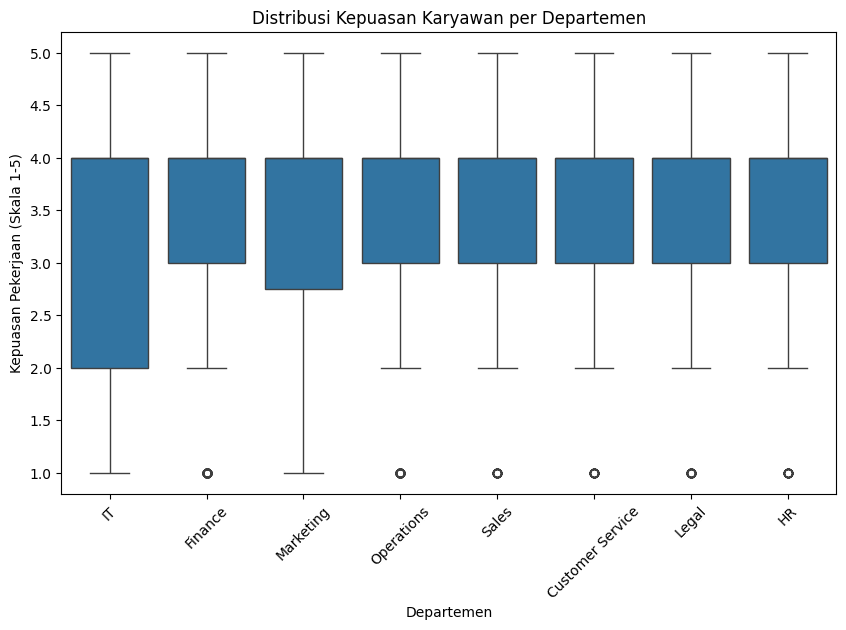

In [ ]:
# Visualisasi distribusi job satisfaction per departemen
plt.figure(figsize=(10, 6))
sns.boxplot(x='dept', y='job_satisfaction', data=df)
plt.xticks(rotation=45)
plt.title('Distribusi Kepuasan Karyawan per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Kepuasan Pekerjaan (Skala 1-5)')
plt.savefig('job_satisfaction_by_dept.png')

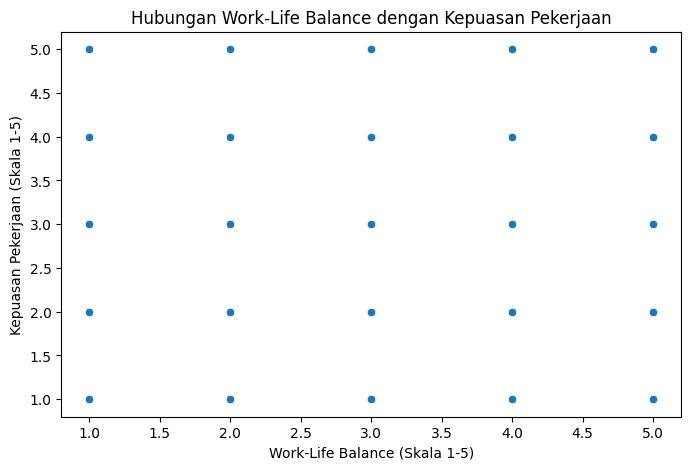

In [ ]:
# Visualisasi hubungan work-life balance (wlb) dengan job satisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x='wlb', y='job_satisfaction', data=df)
plt.title('Hubungan Work-Life Balance dengan Kepuasan Pekerjaan')
plt.xlabel('Work-Life Balance (Skala 1-5)')
plt.ylabel('Kepuasan Pekerjaan (Skala 1-5)')
plt.savefig('wlb_vs_job_satisfaction.png')

In [ ]:
# Identifikasi segmen karyawan
avg_satisfaction = df['job_satisfaction'].mean()
print(f"\nRata-rata Kepuasan Karyawan: {avg_satisfaction:.2f}")


Rata-rata Kepuasan Karyawan: 3.38


In [ ]:
# Segmen berdasarkan job_level
print("\nKepuasan per Tingkat Posisi:")
satisfaction_by_level = df.groupby('job_level')['job_satisfaction'].mean().sort_values(ascending=False)
print(satisfaction_by_level)


Kepuasan per Tingkat Posisi:
job_level
Mid               3.413793
Senior            3.391216
Junior            3.371634
Intern/Fresher    3.364130
Lead              3.308571
Name: job_satisfaction, dtype: float64


In [ ]:
# Segmen dengan kepuasan di atas rata-rata
high_satisfaction = df[df['job_satisfaction'] > avg_satisfaction].groupby('job_level').size()
print("\nJumlah Karyawan dengan Kepuasan Diatas Rata-rata per Tingkat Posisi:")
print(high_satisfaction)


Jumlah Karyawan dengan Kepuasan Diatas Rata-rata per Tingkat Posisi:
job_level
Intern/Fresher    108
Junior            318
Lead              204
Mid               410
Senior            565
dtype: int64


## Exploratory Data Analisis (EDA)

In [ ]:
# Distribusi job_satisfaction
print("Proporsi job_satisfaction:")
print(df['job_satisfaction'].value_counts(normalize=True))

Proporsi job_satisfaction:
job_satisfaction
4    0.407448
3    0.187636
5    0.172813
1    0.140275
2    0.091829
Name: proportion, dtype: float64


In [ ]:
# Jumlah karyawan per age dan job_satisfaction
p_1 = df.groupby(['job_satisfaction', 'age']).agg({'emp_id': 'count'}).reset_index()
p_categories = p_1['job_satisfaction'].unique()

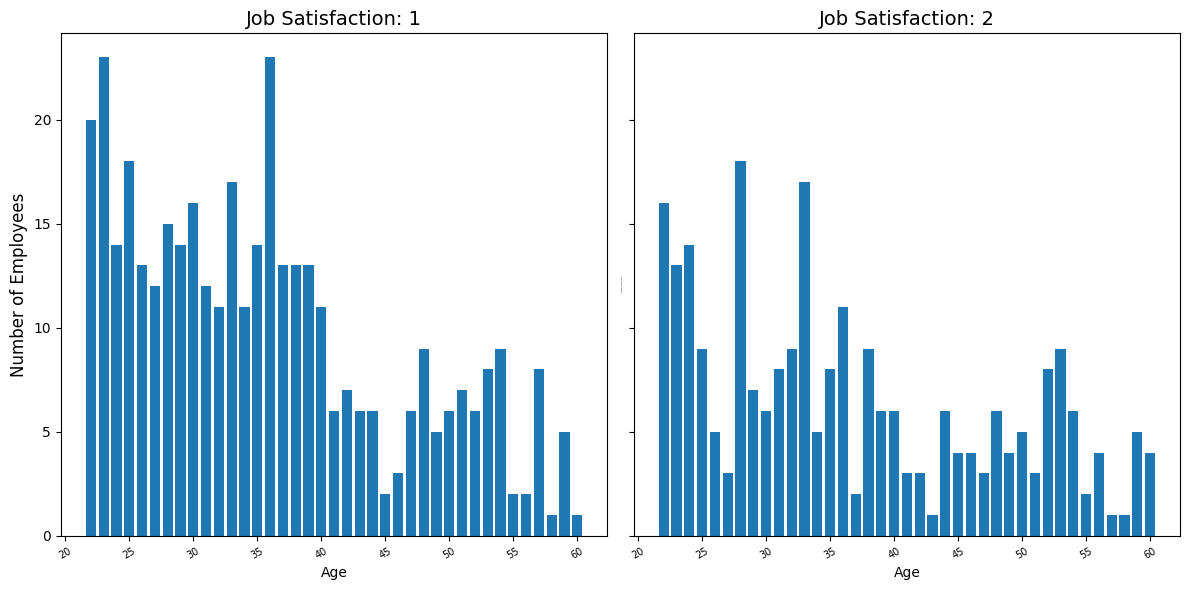

In [ ]:
# Visualisasi bar chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for i, category in enumerate(p_categories[:2]):  # Batasi ke 2 kategori untuk visualisasi
    p_viz = p_1[p_1['job_satisfaction'] == category]
    axes[i].bar(p_viz['age'], height=p_viz['emp_id'])
    axes[i].set_title(f'Job Satisfaction: {category}', fontsize=14)
    axes[i].set_xlabel('Age', fontsize=10)
    axes[i].set_ylabel('Number of Employees', fontsize=12 if i == 0 else 0)
    axes[i].tick_params(axis='x', labelrotation=30, labelsize=7)
plt.tight_layout()
plt.show()

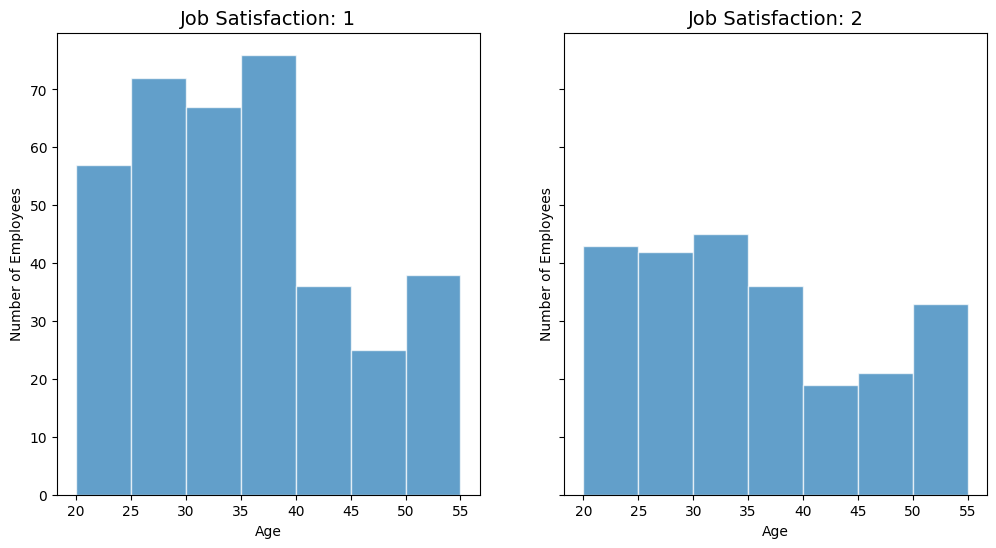

In [ ]:
# Histogram berdasarkan age
bins = range(20, 60, 5)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for i, category in enumerate(p_categories[:2]):
    axes[i].hist(df[df['job_satisfaction'] == category]['age'],
                 bins=bins,
                 edgecolor='white',
                 alpha=0.7)
    axes[i].set_title(f'Job Satisfaction: {category}', fontsize=14)
    axes[i].set_xlabel('Age', fontsize=10)
    axes[i].set_ylabel('Number of Employees', fontsize=10)
plt.show()

In [ ]:
# Crosstab job_satisfaction by have_ot
print("\nProporsi job_satisfaction berdasarkan Overtime:")
print(pd.crosstab(index=df['have_ot'],
                  columns=df['job_satisfaction'],
                  normalize='columns'))


Proporsi job_satisfaction berdasarkan Overtime:
job_satisfaction         1         2         3         4         5
have_ot                                                           
False             0.523196  0.716535  0.606936  0.743567  0.757322
True              0.476804  0.283465  0.393064  0.256433  0.242678


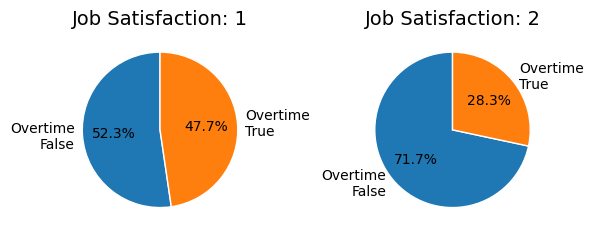

In [ ]:
p_2 = df.groupby(['job_satisfaction', 'have_ot']).agg({'emp_id': 'count'}).reset_index()
fig, axes = plt.subplots(1, 2, figsize=(6, 4))
for i, category in enumerate(p_categories[:2]):
    p_viz = p_2[p_2['job_satisfaction'] == category]
    axes[i].pie(p_viz['emp_id'],
                labels='Overtime\n' + p_viz['have_ot'].astype(str),
                autopct='%1.1f%%',
                startangle=90,
                wedgeprops={'edgecolor': 'white'})
    axes[i].set_title(f'Job Satisfaction: {category}', fontsize=14)
plt.tight_layout()
plt.show()

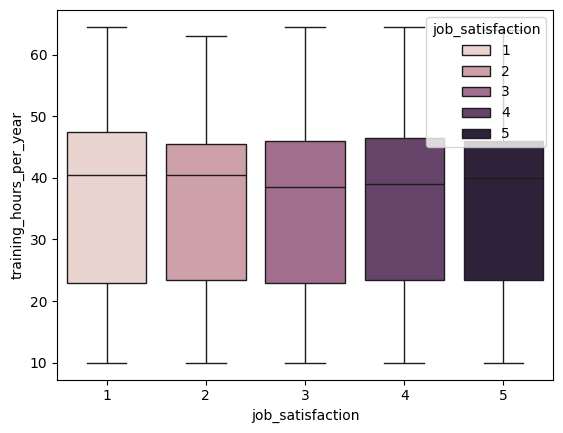

In [ ]:
# Boxplot berdasarkan training_hours_per_year (sebagai pengganti MonthlyIncome)
sns.boxplot(data=df,
            x='job_satisfaction',
            y='training_hours_per_year',
            hue='job_satisfaction')
plt.show()

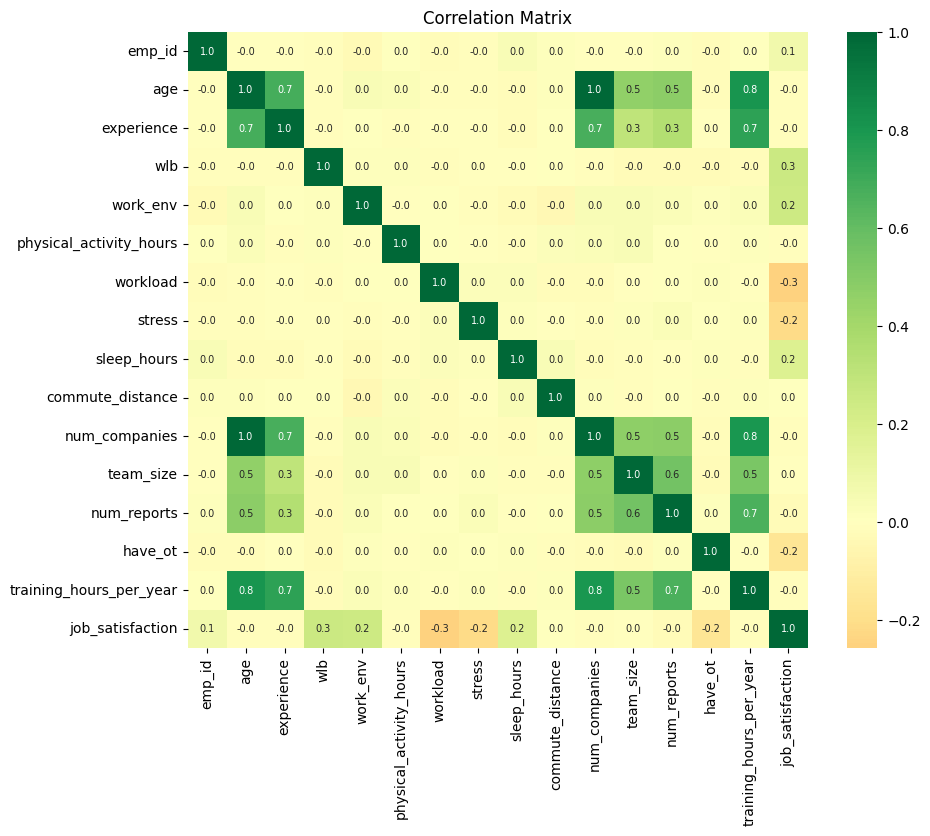

In [ ]:
# Matriks korelasi
corr_matrix = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            cmap='RdYlGn',
            center=0,
            fmt=".1f",
            annot=True,
            annot_kws={"fontsize": 7})
plt.title('Correlation Matrix')
plt.show()

## Modeling

### Train-Test Split

Split data into training set and testing set, with 80% as the training set.

Remove the *employee_number* column since it's not relevant for machine learning prediction.

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
df_clean = df.drop('emp_id', axis=1).copy()

# Konversi job_satisfaction menjadi biner (1 jika > rata-rata, 0 jika <= rata-rata)
avg_satisfaction = df_clean['job_satisfaction'].mean()
df_clean['job_satisfaction'] = (df_clean['job_satisfaction'] > avg_satisfaction).astype(int)

x_train, x_test, y_train, y_test = train_test_split(df_clean.drop(['job_satisfaction'], axis=1),
                                                    df_clean['job_satisfaction'],
                                                    test_size=0.2,
                                                    random_state=123)

In [ ]:
# Cek ketidakseimbangan kelas
p_1 = y_train.value_counts(normalize=True)
p_2 = y_train.value_counts()
print("\nProporsi dan Jumlah Kelas di Training Set:")
print(pd.concat([p_1, p_2], axis=1))


Proporsi dan Jumlah Kelas di Training Set:
                  proportion  count
job_satisfaction                   
1                   0.578662   1280
0                   0.421338    932


### Data Preprocessing

#### Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Oversampling
oversampler = RandomOverSampler(random_state=123)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)
print("\nProporsi Kelas Setelah Oversampling:")
print(y_train_resampled.value_counts(normalize=True))


Proporsi Kelas Setelah Oversampling:
job_satisfaction
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
train_scaler = StandardScaler()
train_numeric = x_train_resampled.select_dtypes(exclude=['object'])
test_numeric = x_test.select_dtypes(exclude=['object'])

train_scaler.fit(train_numeric)
x_train_scaled = train_scaler.transform(train_numeric)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=train_scaler.get_feature_names_out())
x_test_scaled = train_scaler.transform(test_numeric)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=train_scaler.get_feature_names_out())

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')
train_categorical = x_train_resampled.select_dtypes(include=['object'])
test_categorical = x_test.select_dtypes(include=['object'])

one_hot_encoder.fit(train_categorical)
x_train_encoded = one_hot_encoder.transform(train_categorical)
x_train_encoded = pd.DataFrame(x_train_encoded.toarray(),
                               columns=one_hot_encoder.get_feature_names_out())
x_test_encoded = one_hot_encoder.transform(test_categorical)
x_test_encoded = pd.DataFrame(x_test_encoded.toarray(),
                              columns=one_hot_encoder.get_feature_names_out())

In [ ]:
# Gabungkan fitur
x_train_final = pd.concat([x_train_encoded, x_train_scaled], axis=1)
x_test_final = pd.concat([x_test_encoded, x_test_scaled], axis=1)

y_train_resampled.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Model Regresi Logistik
model_logistic = LogisticRegression()
model_logistic.fit(x_train_final, y_train_resampled)

y_pred = model_logistic.predict(x_test_final)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       229
           1       0.77      0.73      0.75       325

    accuracy                           0.71       554
   macro avg       0.70      0.71      0.71       554
weighted avg       0.71      0.71      0.71       554



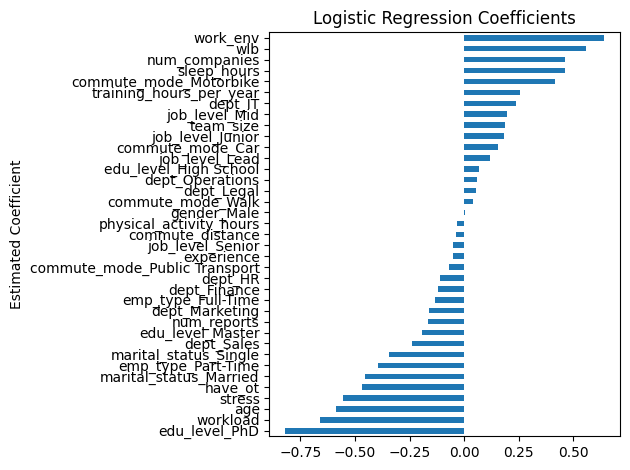

In [ ]:
# Visualisasi koefisien
coefficients = pd.Series(model_logistic.coef_[0], index=model_logistic.feature_names_in_)
coefficients = coefficients.sort_values()
fig, ax = plt.subplots()
coefficients.plot.barh(ax=ax)
ax.set_title("Logistic Regression Coefficients")
ax.set_ylabel("Estimated Coefficient")
fig.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# Membaca dataset
df = pd.read_csv('EmployeeSurvey.csv')

# Pilih kolom numerik
numeric_cols = ['age', 'experience', 'training_hours_per_year', 'job_satisfaction', 'wlb', 'workload', 'sleep_hours', 'physical_activity_hours']
numeric_df = df[numeric_cols]

# Hitung matriks korelasi
corr_matrix = numeric_df.corr()

# Ubah matriks korelasi ke format panjang (long format) untuk Power BI
corr_matrix = corr_matrix.stack().reset_index()
corr_matrix.columns = ['Variable1', 'Variable2', 'Correlation']

# Simpan ke CSV
corr_matrix.to_csv('correlation_matrix.csv', index=False)
print("Matriks korelasi telah disimpan ke 'correlation_matrix.csv'")

Matriks korelasi telah disimpan ke 'correlation_matrix.csv'
